Лабораторная работа по теме Линейная регрессия
Выполнил студент 1 курса магистратуры Аналитака данных
Владислав Шкаровский, группа S4101, 472677

In [47]:
# Первым делом импортируем необходимые библиотеки и настроим отображение
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

matplotlib.style.use('ggplot')
%matplotlib inline

In [48]:
# Назначим папку рабочей директории проекта
os.chdir("E:\\ИТМО\\Магистратура\\01 Семестр\\Анализ данных на Python\\Задачи для лабораторной xx")

In [49]:
# Импортируем данные из файла используя разделитель ';', 
# указал разделитель для десятичных, настром движок на python и отобразим данные
df = pd.read_csv('Chicago_hotels.csv', sep=';', decimal=',', engine='python')
df

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07
...,...,...,...,...,...,...
115,August,2003,,,,
116,September,2003,,,,
117,October,2003,,,,
118,November,2003,,,,


In [50]:
# Посмотрю с какими данными именю дело
df['x4'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 120 entries, 0 to 119
Series name: x4
Non-Null Count  Dtype 
--------------  ----- 
120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [51]:
# Перевожу string во float
df['x4'] = pd.to_numeric(df['x4'].iloc[:-8], errors='coerce')
df

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07
...,...,...,...,...,...,...
115,August,2003,,,,NaN
116,September,2003,,,,NaN
117,October,2003,,,,NaN
118,November,2003,,,,NaN


In [52]:
# Проверяю результат и вижу float
df['x4'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 120 entries, 0 to 119
Series name: x4
Non-Null Count  Dtype  
--------------  -----  
112 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


In [53]:
# Складываю столбцы даты и привожу к типу данных datetime
df['Date'] = pd.to_datetime(df[['date1','date2']].astype(str).add(' ').sum(1), format='mixed')

In [54]:
# Проверяю подготовленные данные
df[['Date','x4']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    120 non-null    datetime64[ns]
 1   x4      112 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


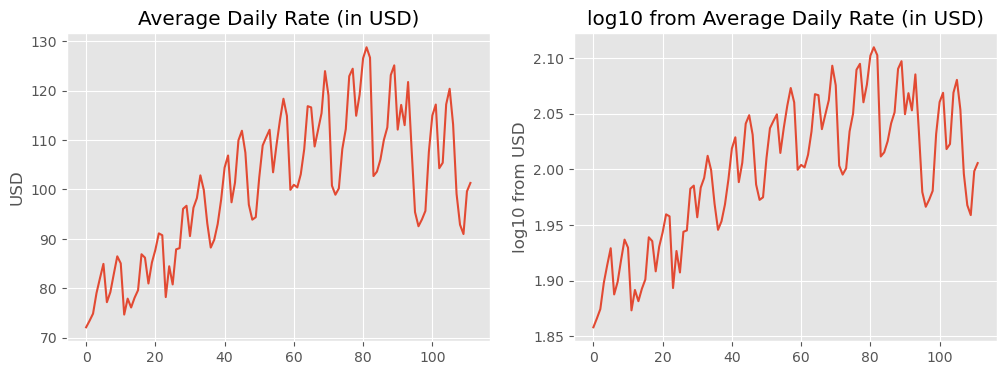

In [55]:
# Построю графики для данных Average Daily Rate (in USD) 
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
df['x4'].iloc[:-8].plot(ax=ax1)
ax1.set_title(u'Average Daily Rate (in USD)')
ax1.set_ylabel(u'USD')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['x4'].iloc[:-8])).plot(ax=ax2)
ax2.set_title(u'log10 from Average Daily Rate (in USD)')
ax2.set_ylabel(u'log10 from USD')
pass

# 1 Есть ли тренд у временного ряда и какой? Есть с переменным характером
# 2 Есть ли сезонность у временного ряда? Да
#   Какая (адитивная или мультипликтативная)? Адитивная
# 3 Меняет ли ряд свой характер? Да меняет в раоне 25 месяца
# 4 есть ли выбросы? Нет

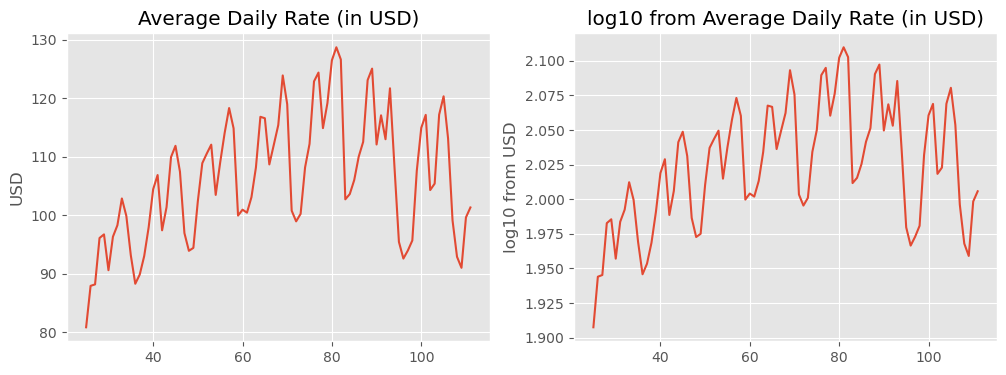

In [56]:
# Построю графики для данных Average Daily Rate (in USD) только после смены характера
# * Решение прянято на онове примера с ликёрами в Австралии
slice = 25

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
df['x4'].iloc[slice:112].plot(ax=ax1)
ax1.set_title(u'Average Daily Rate (in USD)')
ax1.set_ylabel(u'USD')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['x4'].iloc[slice:112])).plot(ax=ax2)
ax2.set_title(u'log10 from Average Daily Rate (in USD)')
ax2.set_ylabel(u'log10 from USD')
pass
# 1 Есть ли тренд у временного ряда и какой? Есть, параболический
# 2 Есть ли сезонность у временного ряда? Да
#   Какая (адитивная или мультипликтативная)? Адитивная
# 3 Меняет ли ряд свой характер? Нет
# 4 Есть ли выбросы? Нет

In [57]:
# Создадим регрисионную переменную month_num - порядковый номер даты и прологорифмирую таргет
# Создадим регрисионную переменную month_num - квадрат даты для построения пароболического прогноза
df['month_num'] = range(1, len(df) + 1)
df['month_num_sq'] = df['month_num'] ** 2
df['log_y'] = np.log10(df['x4'])
df

,date1,date2,x1,x2,x3,x4,Date,month_num,month_num_sq,log_y
0,January,1994,44.3,104.04,51.9,72.15,1994-01-01,1,1,1.858236
1,February,1994,54.7,102.74,60.1,73.47,1994-02-01,2,4,1.866110
2,March,1994,61.9,105.23,65,74.91,1994-03-01,3,9,1.874540
3,April,1994,69.1,113.63,69.8,79.06,1994-04-01,4,16,1.897957
4,May,1994,70.8,120.77,72.4,82.07,1994-05-01,5,25,1.914184
...,...,...,...,...,...,...,...,...,...,...
115,August,2003,,,,NaN,2003-08-01,116,13456,NaN
116,September,2003,,,,NaN,2003-09-01,117,13689,NaN
117,October,2003,,,,NaN,2003-10-01,118,13924,NaN
118,November,2003,,,,NaN,2003-11-01,119,14161,NaN


In [58]:
# Создадим 12 колонок season_1, season_2, ... ,season_12, в которую поместим индикаторы соответсующего месяца
# Чтобы достать порядковый номер месяца в каждой строчке, применим последовательную пару методов
# dt и month к колонке df['Date']. Внутри цикла будем проверять, равен ли очередной месяц текущему значению из цикла
# Посмотрим результат
for x in range(1, 13):
    df['season_' + str(x)] = np.where(df['Date'].dt.month == x, 1, 0)
df

,date1,date2,x1,x2,x3,x4,Date,month_num,month_num_sq,log_y,...,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
0,January,1994,44.3,104.04,51.9,72.15,1994-01-01,1,1,1.858236,...,0,0,0,0,0,0,0,0,0,0
1,February,1994,54.7,102.74,60.1,73.47,1994-02-01,2,4,1.866110,...,0,0,0,0,0,0,0,0,0,0
2,March,1994,61.9,105.23,65,74.91,1994-03-01,3,9,1.874540,...,1,0,0,0,0,0,0,0,0,0
3,April,1994,69.1,113.63,69.8,79.06,1994-04-01,4,16,1.897957,...,0,1,0,0,0,0,0,0,0,0
4,May,1994,70.8,120.77,72.4,82.07,1994-05-01,5,25,1.914184,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,August,2003,,,,NaN,2003-08-01,116,13456,NaN,...,0,0,0,0,0,1,0,0,0,0
116,September,2003,,,,NaN,2003-09-01,117,13689,NaN,...,0,0,0,0,0,0,1,0,0,0
117,October,2003,,,,NaN,2003-10-01,118,13924,NaN,...,0,0,0,0,0,0,0,1,0,0
118,November,2003,,,,NaN,2003-11-01,119,14161,NaN,...,0,0,0,0,0,0,0,0,1,0


In [59]:
# Для устранения линейной зависимости между колонками, один из сезонных индикаторов придется исключить.
# Пусть базовым месяцем будет АПРЕЛЬ (коллинеарность)
month = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]

season_columns = ['season_' + str(x) for x in month]

# Создадим объекты матрицу X и вектор Y для обучения модели
X = df[['month_num', 'month_num_sq', *season_columns]].iloc[slice:]
Y = df['log_y'].iloc[slice:]

# Оставим только те строчки у которых известны значения
X1 = X[X.index < 112]
Y1 = Y[Y.index < 112]

In [60]:
X

,month_num,month_num_sq,season_1,season_2,season_3,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
25,26,676,0,1,0,0,0,0,0,0,0,0,0
26,27,729,0,0,1,0,0,0,0,0,0,0,0
27,28,784,0,0,0,0,0,0,0,0,0,0,0
28,29,841,0,0,0,1,0,0,0,0,0,0,0
29,30,900,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,13456,0,0,0,0,0,0,1,0,0,0,0
116,117,13689,0,0,0,0,0,0,0,1,0,0,0
117,118,13924,0,0,0,0,0,0,0,0,1,0,0
118,119,14161,0,0,0,0,0,0,0,0,0,1,0


In [61]:
# Настраиваем линейную регрессионную модель и обучаю 
model = LinearRegression( fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
model.fit(X1, Y1)
print("Коэффициенты:", model.coef_)
print("Свободный член:", model.intercept_)

Коэффициенты: [ 6.09207024e-03 -3.87420972e-05 -4.58210974e-02 -4.23001445e-02
 -1.87473832e-02  2.94792006e-02  3.39435214e-02 -5.07046883e-03
  1.10986295e-02  2.93275645e-02  4.65627258e-02  2.51575873e-02
 -3.41498985e-02]
Свободный член: 1.8109661772470231


<Axes: >

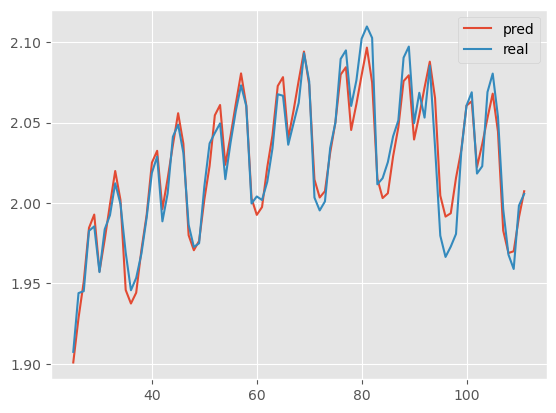

In [62]:
# Прменяю модель к своим историческим данным и сопровождаю графиком
# Определяю насколько хороша подгонка, делаю вывод выглядит правдаподобно
pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': Y1})
pred.plot()

<Axes: >

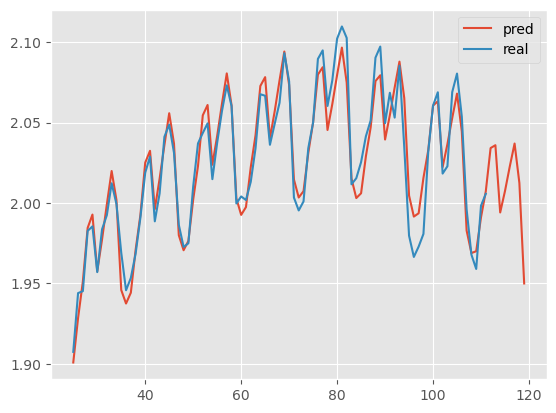

In [63]:
# После применяю модель для всех данных,
# для определения неизвестных значений 8-ми месяцев
# Строю прогноз
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': Y})
pred.plot()

In [64]:
# Найдём индекс
slice_2 = len(df) - slice - 8

In [65]:
# Получаю результат в числовом виде прогноз для логорифмов
pred['pred'][slice_2:]

112    2.034151
113    2.035913
114    1.994120
115    2.007431
116    2.022725
117    2.036948
118    2.012453
119    1.949979
Name: pred, dtype: float64

In [66]:
# Получаю прогноз для исходного ряда на 8 месяцев май - декабрь
res = 10 ** pred['pred'][slice_2:]
# pd.options.display.float_format ='{:,.2f}'.format
target_date = df['Date'][112:]
# Average Daily Rate (in $)

In [67]:
# Получаю df прогноза pred - прогноз цены в USD
res_df = pd.merge(target_date, res, left_index=True, right_index=True)
res_df

,Date,pred
112,2003-05-01,108.181121
113,2003-06-01,108.620904
114,2003-07-01,98.655102
115,2003-08-01,101.725842
116,2003-09-01,105.372041
117,2003-10-01,108.880030
118,2003-11-01,102.908983
119,2003-12-01,89.120683


In [68]:
# Владислав Шкаровский github: https://github.com/0z0nize